<a href="https://colab.research.google.com/github/Lohith288/AI-ML-INTERNSHIP-VRSEC/blob/main/TASK6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **GETTING REQURIED LIBRARIES**

In [34]:
import math
import numpy as np
import pandas as pd
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### **READING THE DATA SETS**

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
test = pd.read_csv('/content/drive/MyDrive/Task6 dataset/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Task6 dataset/train.csv')

In [37]:
train.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [38]:
train.head()


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [39]:
train.tail()


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[5 rows x 21 columns]

In [40]:
test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [41]:
test.tail()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[5 rows x 21 columns]

### **CHECKING THE DATA SET**

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [43]:
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [44]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [45]:
train.duplicated().sum()

0

In [46]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [47]:
import pandas as pd

for column in train.columns:
    unique_values = train[column].unique()
    length_of_unique_values = len(unique_values)

    print(f"Column '{column}' has {length_of_unique_values} unique values.")


Column 'battery_power' has 1094 unique values.
Column 'blue' has 2 unique values.
Column 'clock_speed' has 26 unique values.
Column 'dual_sim' has 2 unique values.
Column 'fc' has 20 unique values.
Column 'four_g' has 2 unique values.
Column 'int_memory' has 63 unique values.
Column 'm_dep' has 10 unique values.
Column 'mobile_wt' has 121 unique values.
Column 'n_cores' has 8 unique values.
Column 'pc' has 21 unique values.
Column 'px_height' has 1137 unique values.
Column 'px_width' has 1109 unique values.
Column 'ram' has 1562 unique values.
Column 'sc_h' has 15 unique values.
Column 'sc_w' has 19 unique values.
Column 'talk_time' has 19 unique values.
Column 'three_g' has 2 unique values.
Column 'touch_screen' has 2 unique values.
Column 'wifi' has 2 unique values.
Column 'price_range' has 4 unique values.


In [48]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### **COLUMNS OF THE DATA SET**

In [49]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### **CORRELATION MATRIX AND FEATURE SELECTION**

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb


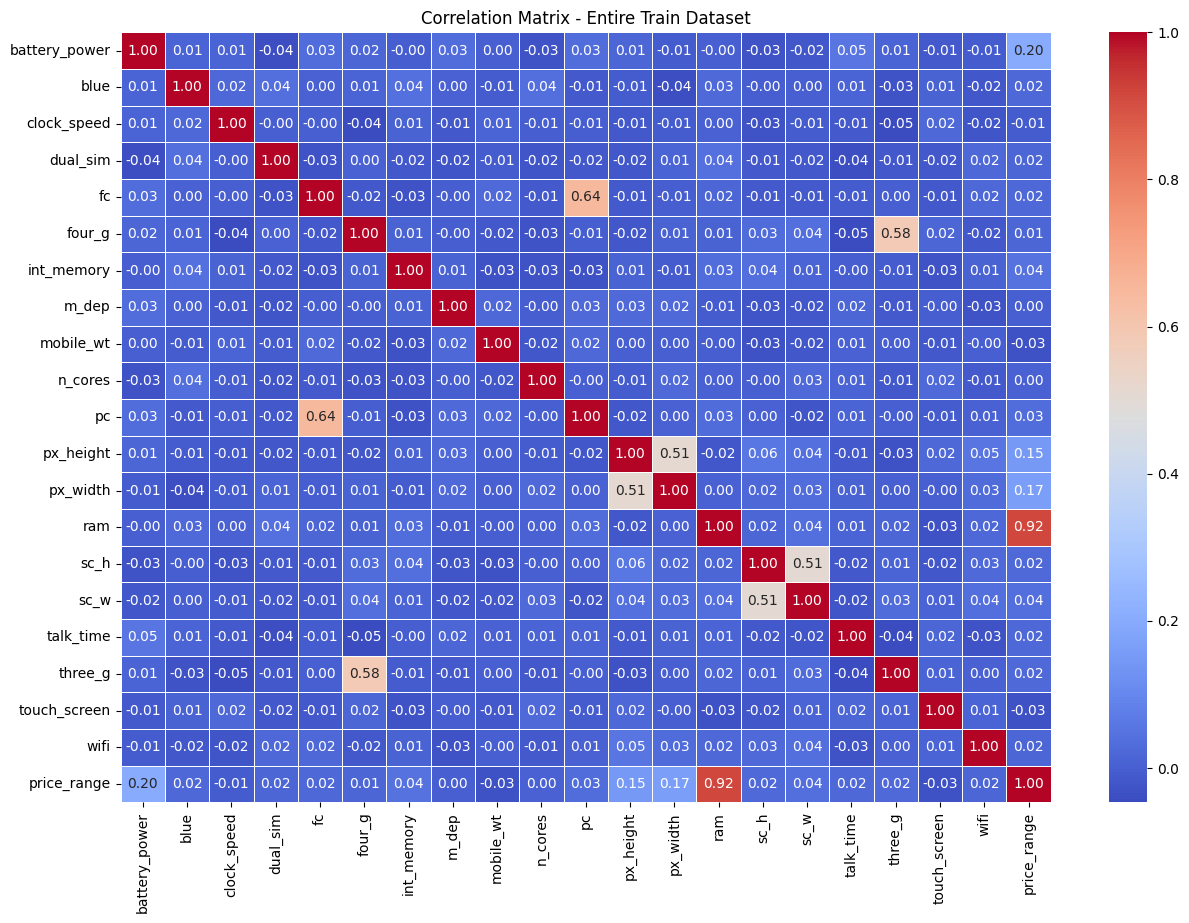

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train = pd.read_csv('/content/drive/MyDrive/Task6 dataset/train.csv')


# Calculate the correlation matrix
correlation_matrix = train.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix - Entire Train Dataset')
plt.show()


In [73]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df'
selected_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

correlation_matrix = train[selected_features].corr()

# Get the correlation of each feature with 'price_range'
correlation_with_price_range = correlation_matrix['price_range']

# Set a threshold for correlation (you can adjust this based on your needs)
threshold = 0.1

# Select features with correlation above the threshold
selected_features = correlation_with_price_range[abs(correlation_with_price_range) > threshold].index.tolist()

# Print the selected features
print(selected_features)


['battery_power', 'px_height', 'px_width', 'ram', 'price_range']


### **EDA**

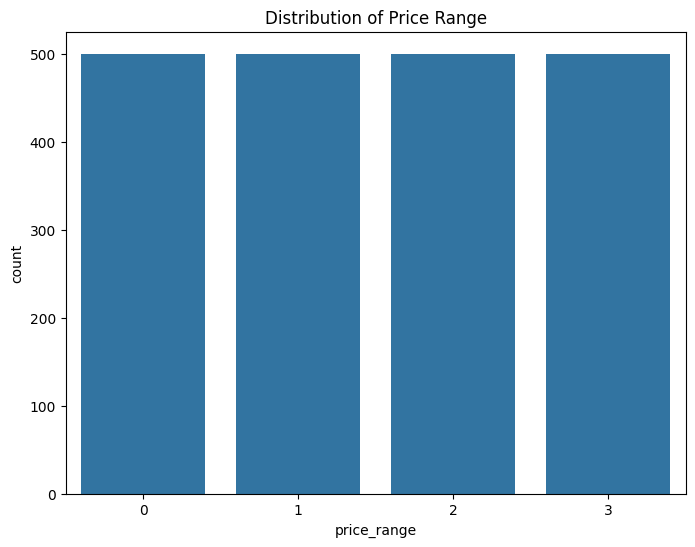

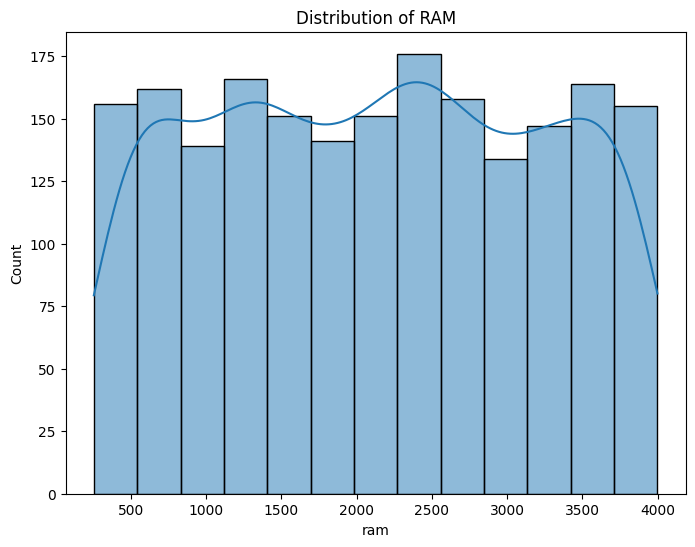

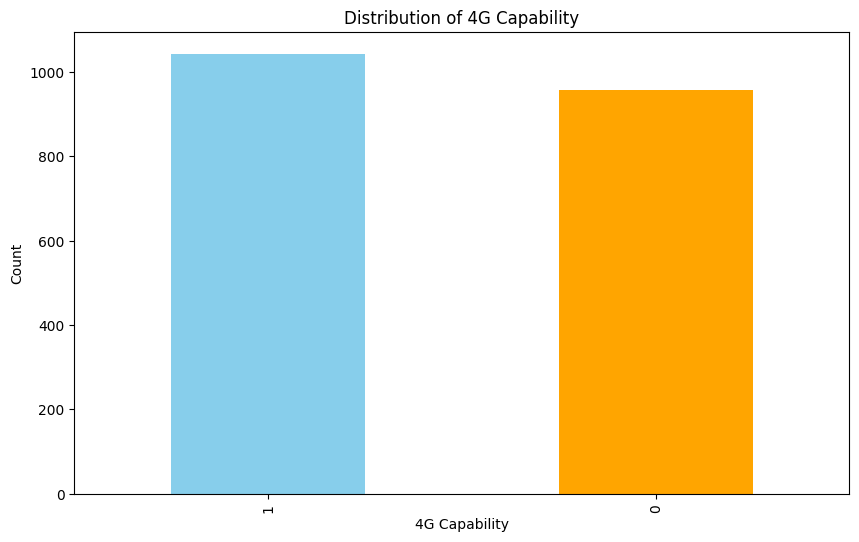

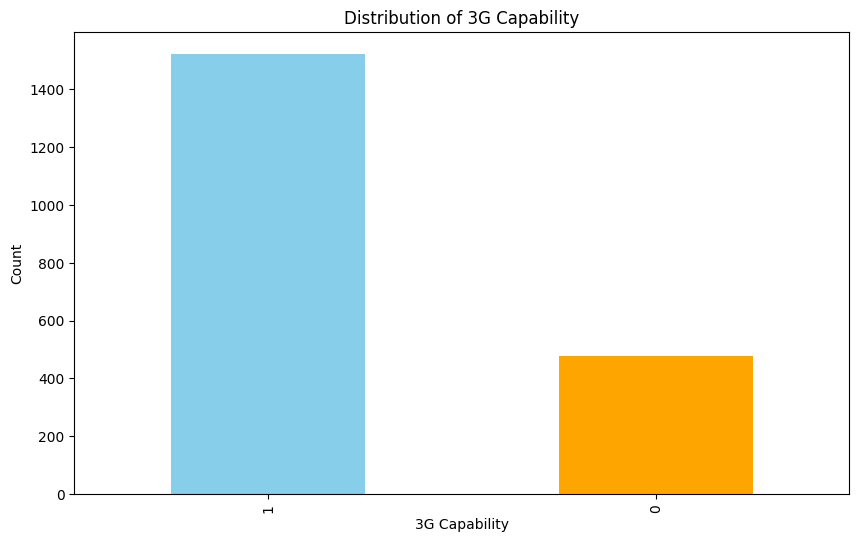

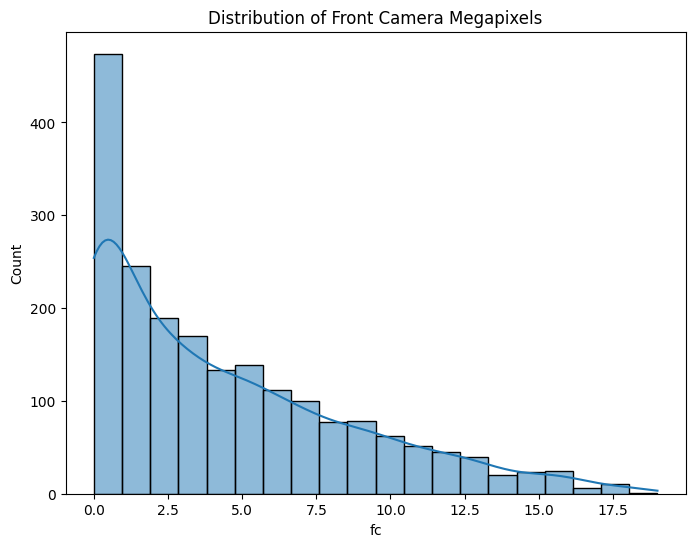

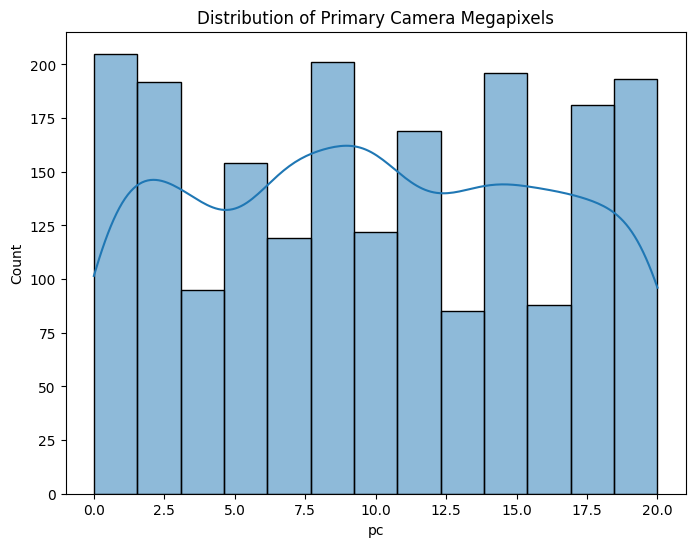

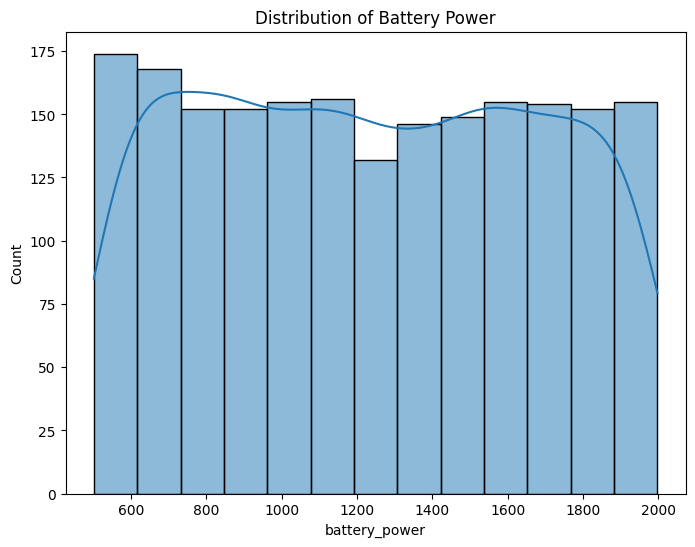

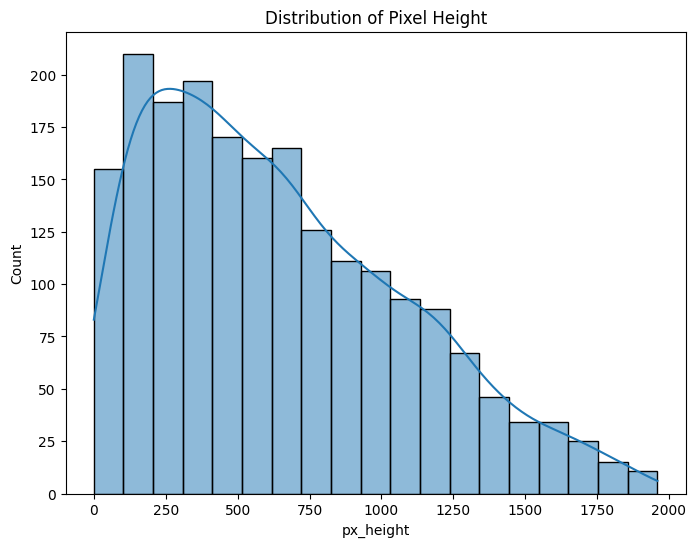

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Price Range
plt.figure(figsize=(8, 6))
sns.countplot(x='price_range', data=train)
plt.title('Distribution of Price Range')
plt.show()

# RAM
plt.figure(figsize=(8, 6))
sns.histplot(train['ram'], kde=True)
plt.title('Distribution of RAM')
plt.show()

# Four_G and Three_G
plt.figure(figsize=(10, 6))
train['four_g'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of 4G Capability')
plt.xlabel('4G Capability')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
train['three_g'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of 3G Capability')
plt.xlabel('3G Capability')
plt.ylabel('Count')
plt.show()

# Front Camera Megapixels (fc) and Primary Camera Megapixels (pc)
plt.figure(figsize=(8, 6))
sns.histplot(train['fc'], kde=True)
plt.title('Distribution of Front Camera Megapixels')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(train['pc'], kde=True)
plt.title('Distribution of Primary Camera Megapixels')
plt.show()

# Battery Power
plt.figure(figsize=(8, 6))
sns.histplot(train['battery_power'], kde=True)
plt.title('Distribution of Battery Power')
plt.show()

# Pixel Height (assuming px_height is not repeated, otherwise replace it with the correct variable)
plt.figure(figsize=(8, 6))
sns.histplot(train['px_height'], kde=True)
plt.title('Distribution of Pixel Height')
plt.show()


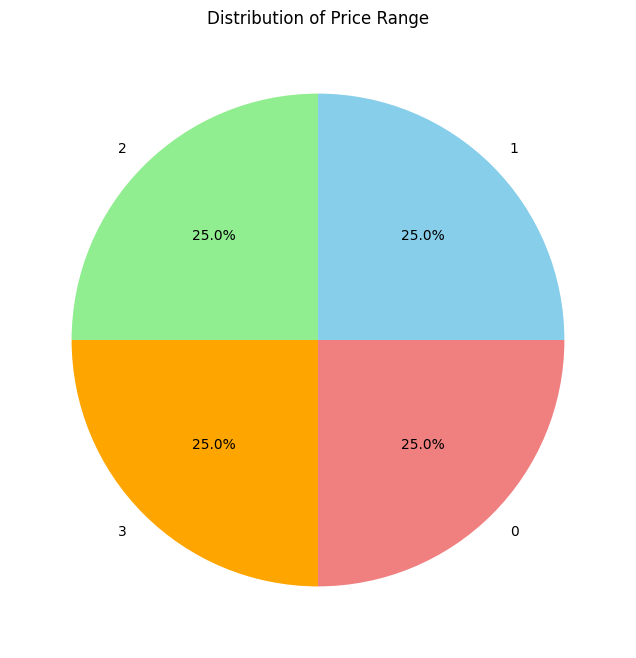

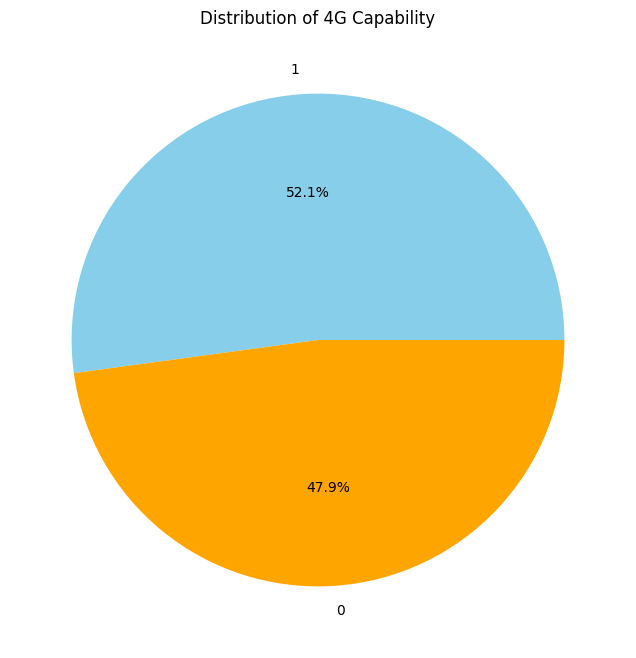

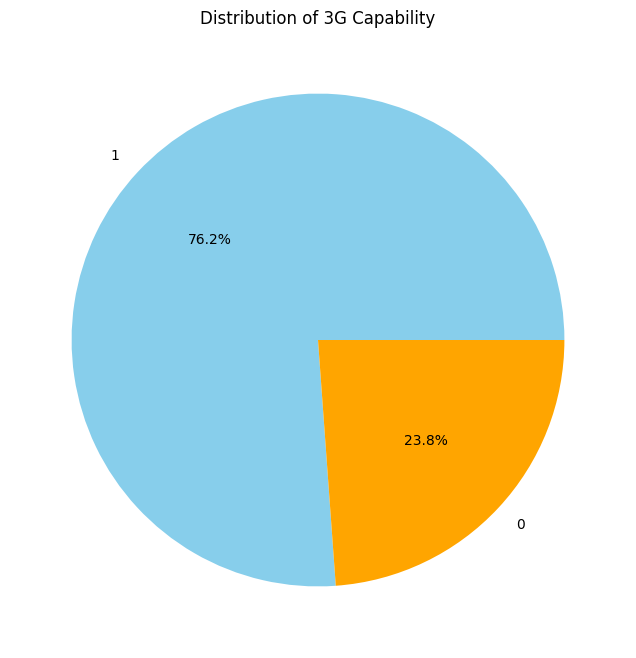

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Pie chart for Price Range
plt.figure(figsize=(8, 8))
price_range_counts = train['price_range'].value_counts()
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribution of Price Range')
plt.show()


# Pie chart for Four_G
plt.figure(figsize=(8, 8))
four_g_counts = train['four_g'].value_counts()
plt.pie(four_g_counts, labels=four_g_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of 4G Capability')
plt.show()

# Pie chart for Three_G
plt.figure(figsize=(8, 8))
three_g_counts = train['three_g'].value_counts()
plt.pie(three_g_counts, labels=three_g_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of 3G Capability')
plt.show()


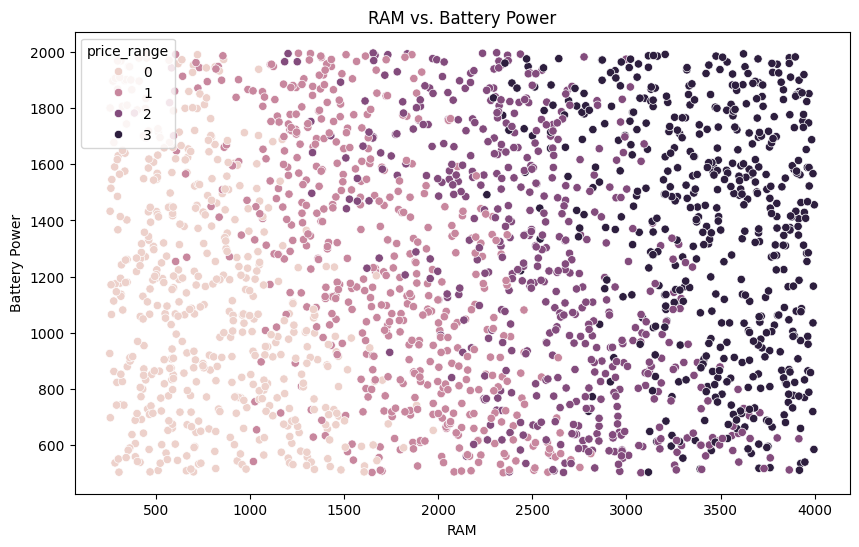

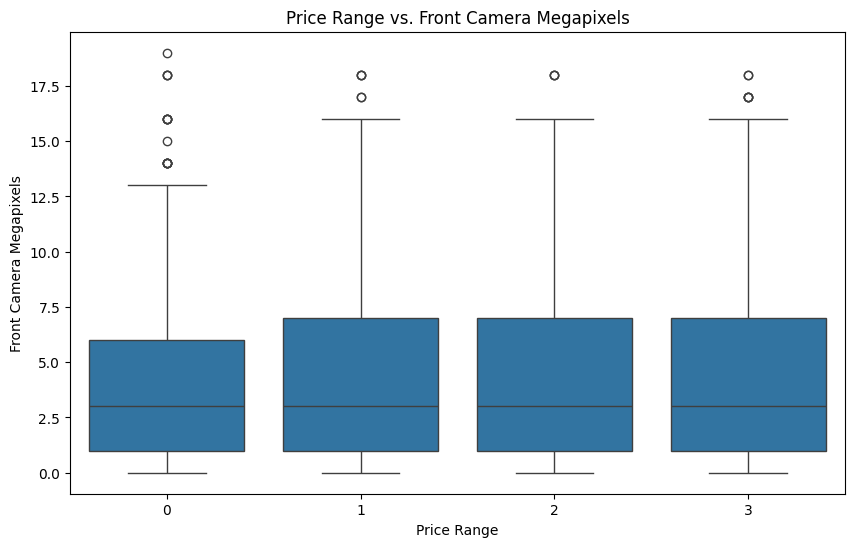

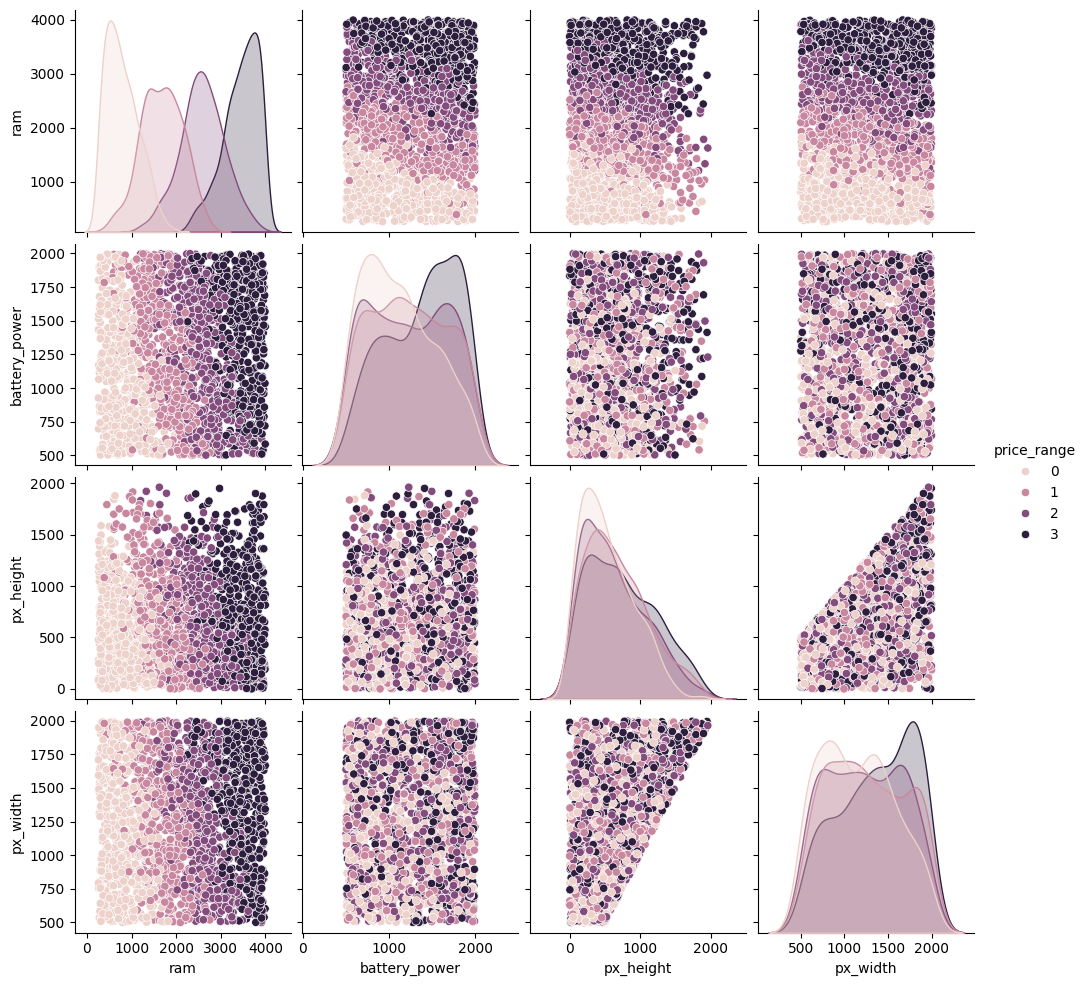

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Bivariate analysis examples

# Scatter plot for RAM vs. Battery Power
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='battery_power', data=train, hue='price_range')
plt.title('RAM vs. Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.show()

# Box plot for Price Range vs. Front Camera Megapixels (fc)
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='fc', data=train)
plt.title('Price Range vs. Front Camera Megapixels')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.show()

# Pair plot for selected variables
sns.pairplot(train[['ram', 'battery_power', 'px_height', 'px_width', 'price_range']], hue='price_range')
plt.show()


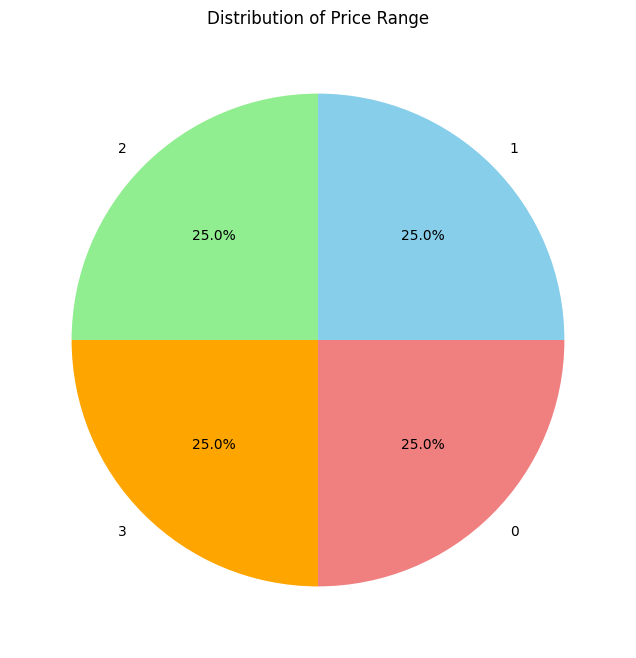

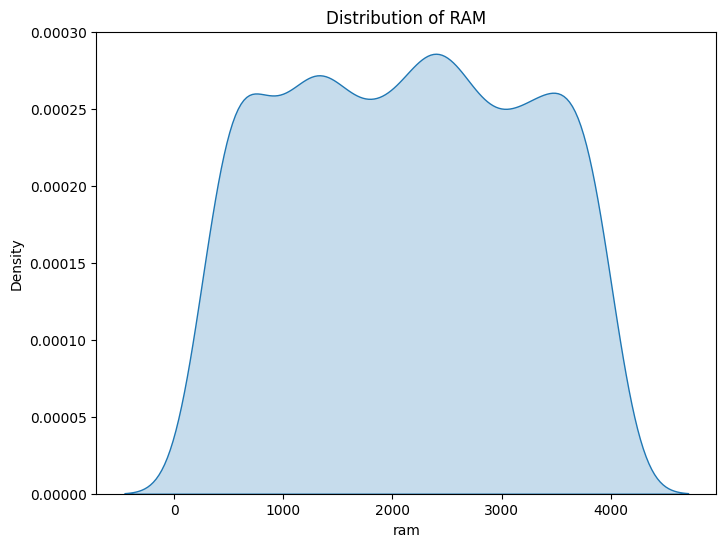

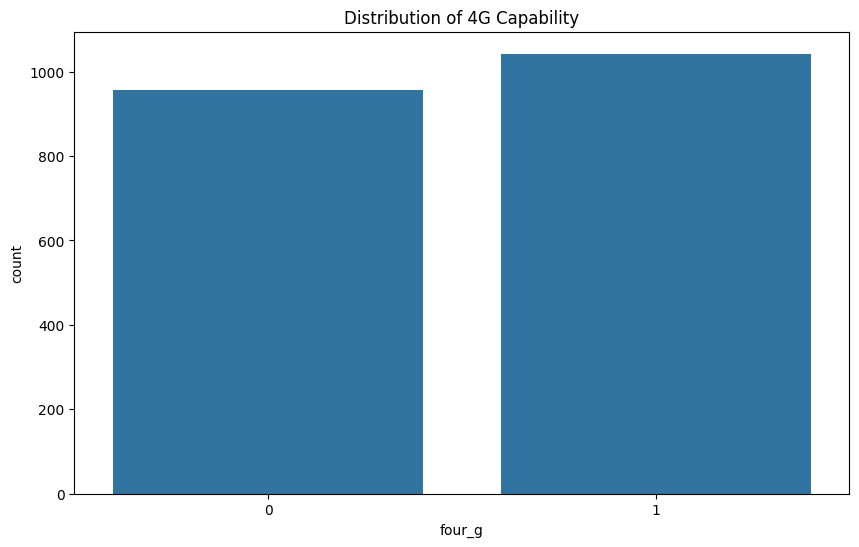

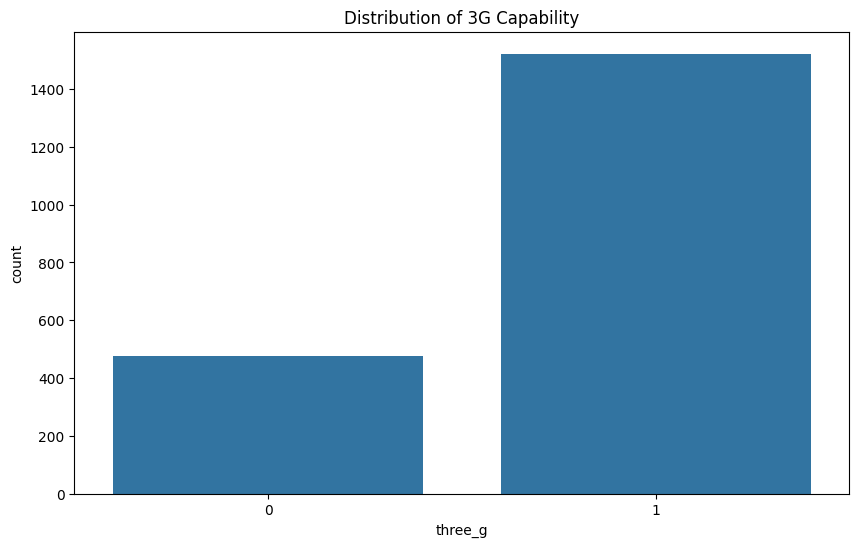

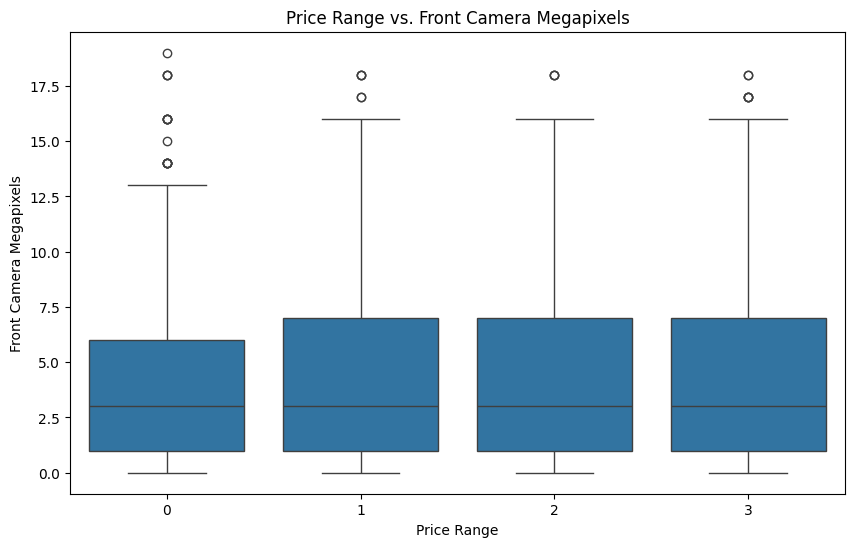

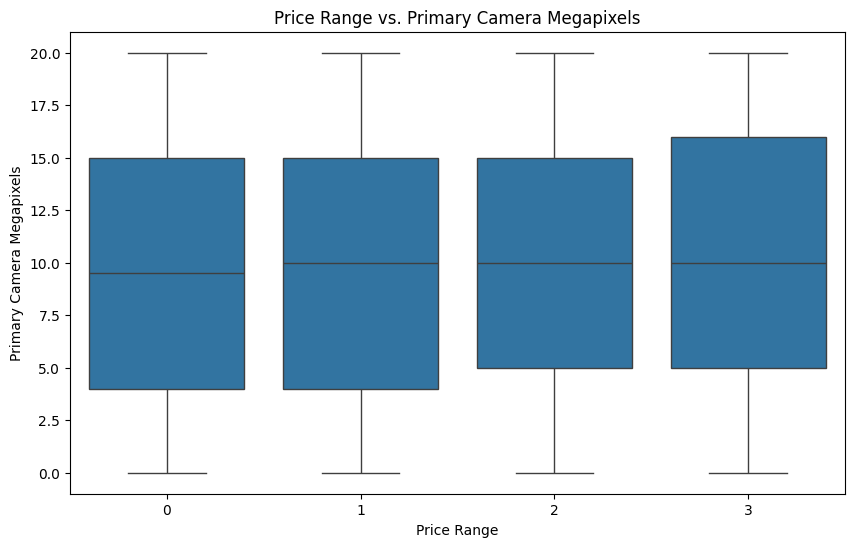

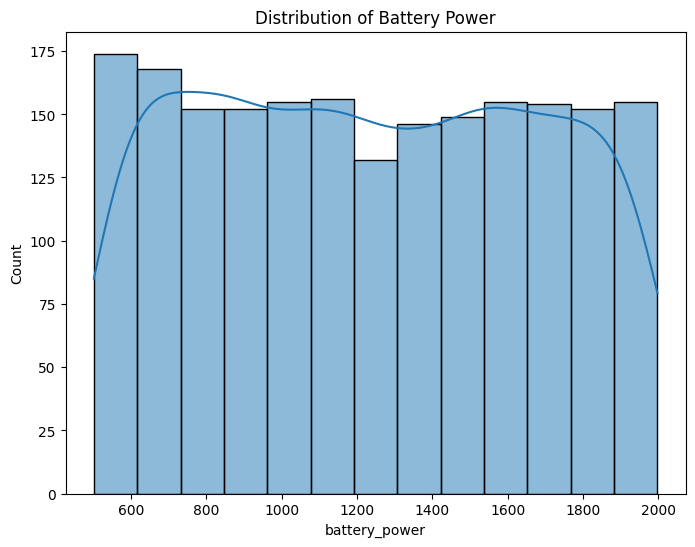

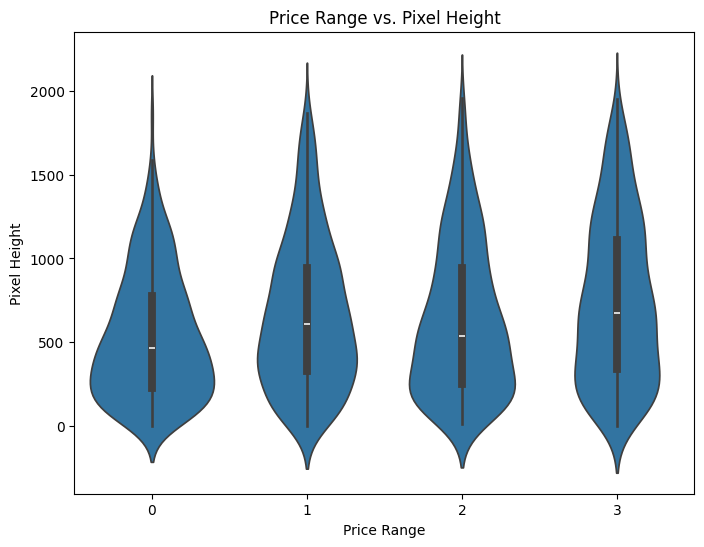

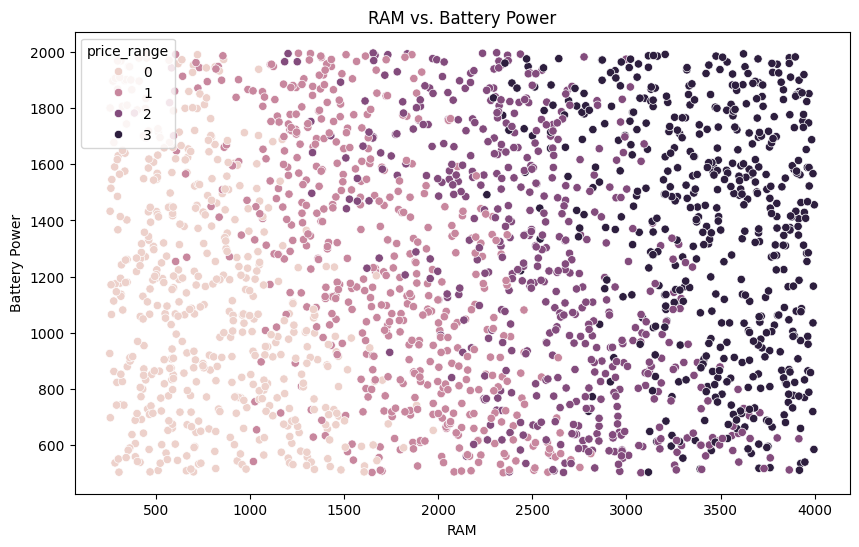

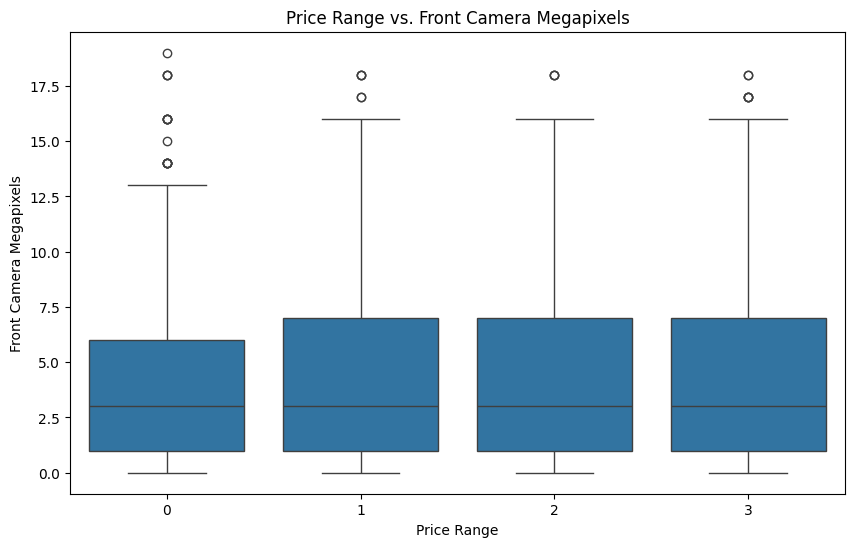

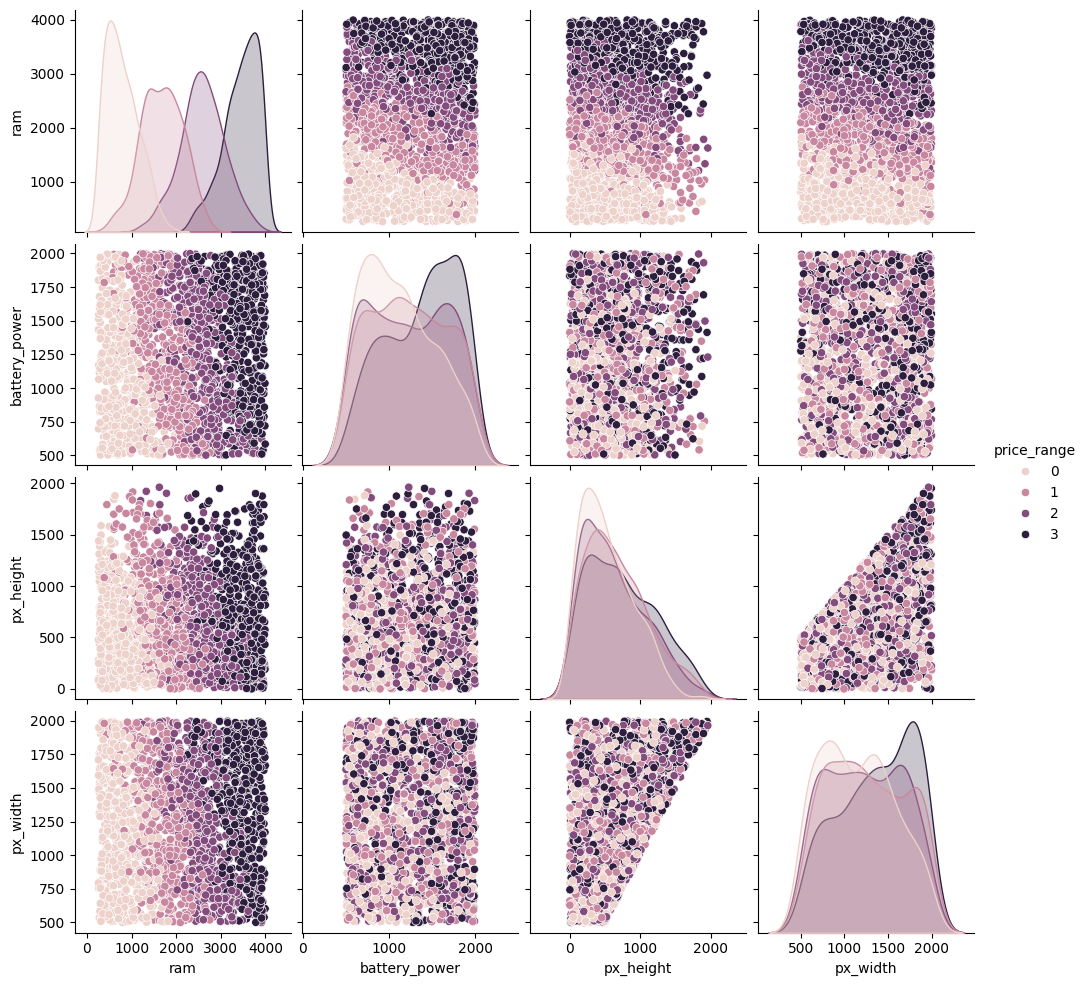

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame with the dataset
# Replace 'your_dataset.csv' with the actual file or load the dataset using another method
# train = pd.read_csv('your_dataset.csv')

# Univariate Analysis

# Price Range - Pie Chart
plt.figure(figsize=(8, 8))
price_range_counts = train['price_range'].value_counts()
plt.pie(price_range_counts, labels=price_range_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.title('Distribution of Price Range')
plt.show()

# RAM - KDE Plot
plt.figure(figsize=(8, 6))
sns.kdeplot(train['ram'], fill=True)
plt.title('Distribution of RAM')
plt.show()

# Four_G - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='four_g', data=train)
plt.title('Distribution of 4G Capability')
plt.show()

# Three_G - Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='three_g', data=train)
plt.title('Distribution of 3G Capability')
plt.show()

# Front Camera Megapixels (fc) - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='fc', data=train)
plt.title('Price Range vs. Front Camera Megapixels')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.show()

# Primary Camera Megapixels (pc) - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='pc', data=train)
plt.title('Price Range vs. Primary Camera Megapixels')
plt.xlabel('Price Range')
plt.ylabel('Primary Camera Megapixels')
plt.show()

# Battery Power - Histogram
plt.figure(figsize=(8, 6))
sns.histplot(train['battery_power'], kde=True)
plt.title('Distribution of Battery Power')
plt.show()

# Pixel Height - Violin Plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='price_range', y='px_height', data=train)
plt.title('Price Range vs. Pixel Height')
plt.xlabel('Price Range')
plt.ylabel('Pixel Height')
plt.show()

# Bivariate Analysis

# RAM vs. Battery Power - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ram', y='battery_power', data=train, hue='price_range')
plt.title('RAM vs. Battery Power')
plt.xlabel('RAM')
plt.ylabel('Battery Power')
plt.show()

# Price Range vs. Front Camera Megapixels - Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='fc', data=train)
plt.title('Price Range vs. Front Camera Megapixels')
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.show()

# Pair Plot for Selected Variables
sns.pairplot(train[['ram', 'battery_power', 'px_height', 'px_width', 'price_range']], hue='price_range')
plt.show()


### **ADDITIONAL EDA**

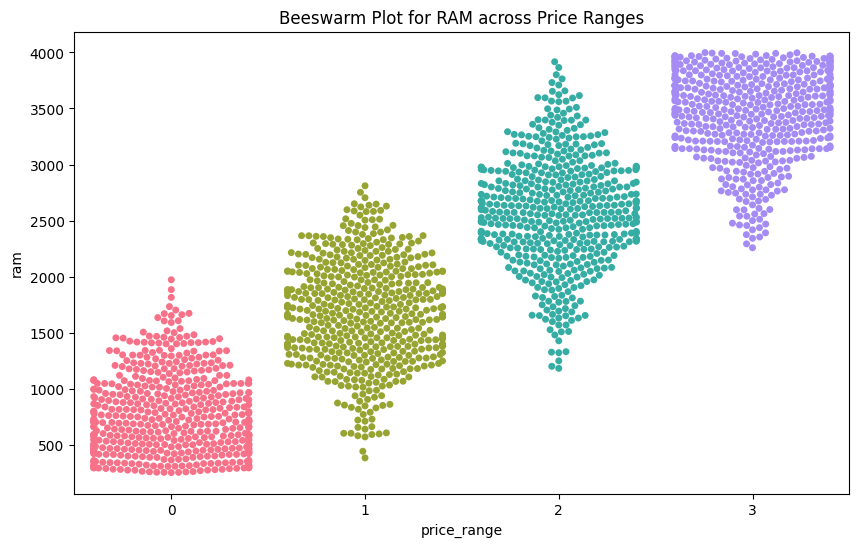

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and contains the specified columns
columns_to_plot = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                   'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                   'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                   'touch_screen', 'wifi', 'price_range']

# Subset the DataFrame with the selected columns
df_subset = train[columns_to_plot]

# Beeswarm Plot for RAM across Price Ranges
plt.figure(figsize=(10, 6))
sns.swarmplot(x='price_range', y='ram', data=df_subset, palette="husl")
plt.title('Beeswarm Plot for RAM across Price Ranges')
plt.show()


<Figure size 1000x600 with 0 Axes>

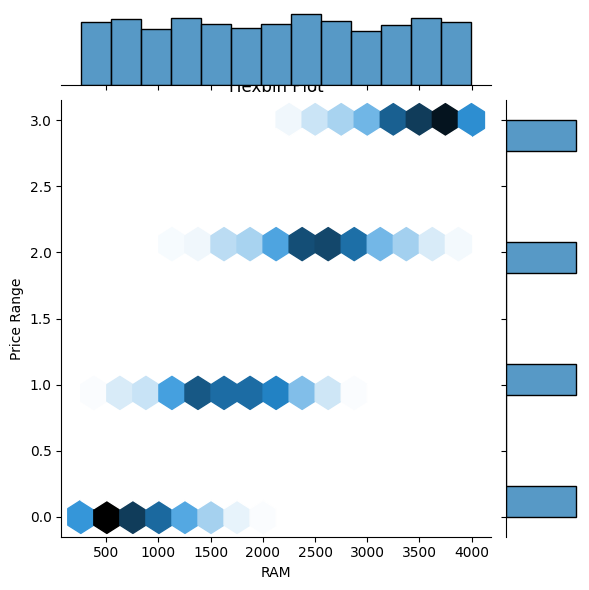

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'train' is your DataFrame and contains the specified columns
df = train[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
            'touch_screen', 'wifi', 'price_range']]





# Hexbin Plot
plt.figure(figsize=(10, 6))
sns.jointplot(x='ram', y='price_range', data=df, kind='hex', gridsize=15)
plt.xlabel('RAM')
plt.ylabel('Price Range')
plt.title('Hexbin Plot')
plt.show()


In [59]:
# Assuming 'train' is your DataFrame
summary = train.describe()
print(summary)


       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

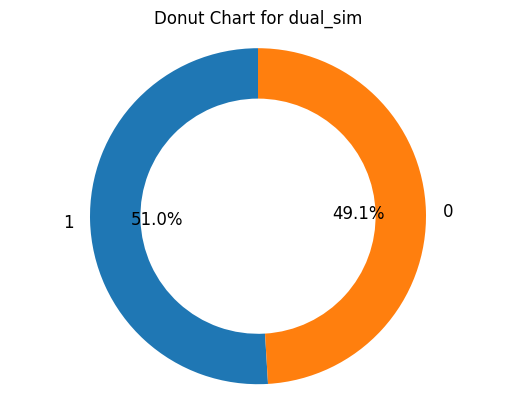

In [60]:
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
labels = train['dual_sim'].value_counts().index
sizes = train['dual_sim'].value_counts().values

# Create a pie chart with a hole
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a circle in the middle to create the hole
center_circle = plt.Circle((0, 0), 0.2, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.title('Donut Chart for dual_sim')
plt.show()


In [61]:
train['dual_sim'].unique()

array([0, 1])

<Axes: ylabel='price range %'>

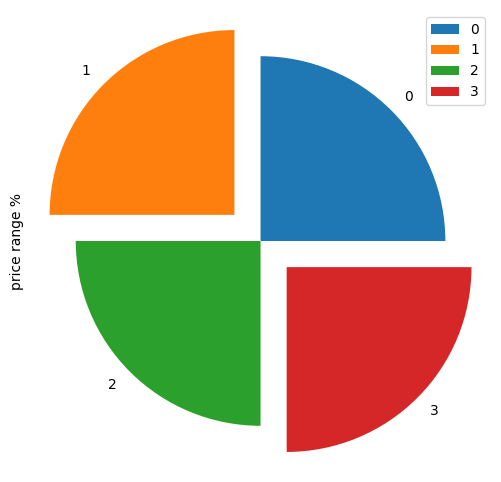

In [62]:
my_dict={'price range %': [25,25,25,25]}
allocation_df=pd.DataFrame(data=my_dict,index=['0','1','2','3'])
allocation_df
explode=(0,0.2,0,0.2)
allocation_df.plot.pie(y='price range %',figsize=(6,6),explode=explode)

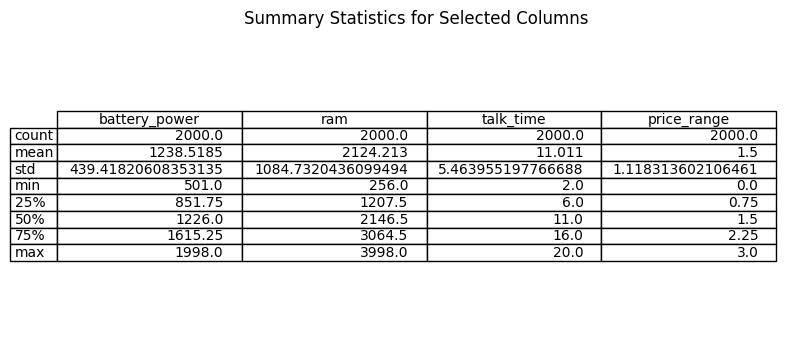

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assuming 'train' is your DataFrame and contains the specified columns
columns_to_plot = ['battery_power', 'ram', 'talk_time', 'price_range']

# Subset the DataFrame with the selected columns
df_subset = train[columns_to_plot]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Hide axes
ax.axis('off')

# Create a table plot
tab = table(ax, df_subset.describe(), loc='center', colWidths=[0.2]*len(columns_to_plot))

# Set table font size
tab.auto_set_font_size(False)
tab.set_fontsize(10)

# Adjust layout
tab.auto_set_column_width(col=list(range(len(columns_to_plot))))

# Set table title
ax.set_title('Summary Statistics for Selected Columns', fontsize=12)

plt.show()


### **LABEL ENCODING**

In [64]:
import sklearn.preprocessing

label_encoder = sklearn.preprocessing.LabelEncoder()

columns_to_encode = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
                     'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                     'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
                     'three_g', 'touch_screen', 'wifi']

# Apply Label Encoding to each specified column in the 'test' dataset
for column in columns_to_encode:
    test[column] = label_encoder.fit_transform(test[column])

### **CLASSIFICATION USING RANDOM FOREST**

***RANDOM FOREST USING ALL FEATURES***

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
            'touch_screen', 'wifi']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report for Random Forest
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Training Set Accuracy: {accuracy_train_rf:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_rf:.2f}')


# Check for overfitting
if accuracy_train_rf > accuracy_rf:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



Random Forest Accuracy: 0.89
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400

Training Set Accuracy: 1.00
Test Set Accuracy: 0.89
Overfitting Detected: Training accuracy is higher than testing accuracy.


***RANDOM FOREST USING SELECTED FEATURES***

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
features = ['battery_power', 'px_height', 'px_width', 'ram']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report for Random Forest
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Training Set Accuracy: {accuracy_train_rf:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_rf:.2f}')


# Check for overfitting
if accuracy_train_rf > accuracy_rf:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



Random Forest Accuracy: 0.93
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       105
           1       0.89      0.97      0.93        91
           2       0.87      0.89      0.88        92
           3       0.96      0.91      0.94       112

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

Training Set Accuracy: 1.00
Test Set Accuracy: 0.93
Overfitting Detected: Training accuracy is higher than testing accuracy.


In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['four_g','three_g','fc','pc','ram','battery_power','px_height','px_width']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report for Random Forest
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Training Set Accuracy: {accuracy_train_rf:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_rf:.2f}')


# Check for overfitting
if accuracy_train_rf > accuracy_rf:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



Random Forest Accuracy: 0.92
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96       105
           1       0.87      0.95      0.91        91
           2       0.86      0.87      0.86        92
           3       0.95      0.90      0.93       112

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400

Training Set Accuracy: 1.00
Test Set Accuracy: 0.92
Overfitting Detected: Training accuracy is higher than testing accuracy.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


features = ['four_g','ram','price_range']

target = 'three_g'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set using Random Forest
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Classification report for Random Forest
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
# Predictions on the training set
y_train_pred_rf = rf_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_rf = accuracy_score(y_train, y_train_pred_rf)
print(f'Training Set Accuracy: {accuracy_train_rf:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_rf:.2f}')


# Check for overfitting
if accuracy_train_rf > accuracy_rf:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")


Random Forest Accuracy: 0.72
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44        98
           1       0.82      0.82      0.82       302

    accuracy                           0.73       400
   macro avg       0.63      0.63      0.63       400
weighted avg       0.72      0.72      0.72       400

Training Set Accuracy: 0.99
Test Set Accuracy: 0.72
Overfitting Detected: Training accuracy is higher than testing accuracy.


### **CLASSIFICATION USING  XGBOOST**

***XGBOOST  USING ALL FEATURES***

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
            'touch_screen', 'wifi']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Training the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set using XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

# Classification report for XGBoost
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))
# Predictions on the training set
y_train_pred_xgb = xgb_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Set Accuracy: {accuracy_train_xgb:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_xgb:.2f}')


# Check for overfitting
if accuracy_train_xgb > accuracy_xgb:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



XGBoost Accuracy: 0.91
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       105
           1       0.88      0.93      0.90        91
           2       0.84      0.85      0.84        92
           3       0.93      0.88      0.91       112

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.91      0.91      0.91       400

Training Set Accuracy: 1.00
Test Set Accuracy: 0.91
Overfitting Detected: Training accuracy is higher than testing accuracy.


**XGBOOST USING SELECTED FEATURES**

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
features = ['battery_power', 'px_height', 'px_width', 'ram']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Training the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set using XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

# Classification report for XGBoost
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))
# Predictions on the training set
y_train_pred_xgb = xgb_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Set Accuracy: {accuracy_train_xgb:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_xgb:.2f}')


# Check for overfitting
if accuracy_train_xgb > accuracy_xgb:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



XGBoost Accuracy: 0.94
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       105
           1       0.90      0.97      0.93        91
           2       0.89      0.90      0.90        92
           3       0.95      0.93      0.94       112

    accuracy                           0.94       400
   macro avg       0.93      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400

Training Set Accuracy: 1.00
Test Set Accuracy: 0.94
Overfitting Detected: Training accuracy is higher than testing accuracy.


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'train' is your DataFrame and 'price_range' is the target variable
features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
            'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
            'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
            'touch_screen', 'wifi']

target = 'price_range'

# Extracting features and target variable
X = train[features]
y = train[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

# XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=50)

# Training the XGBoost model
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set using XGBoost
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluating the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

# Classification report for XGBoost
print('XGBoost Classification Report:\n', classification_report(y_test, y_pred_xgb))
# Predictions on the training set
y_train_pred_xgb = xgb_classifier.predict(X_train)

# Evaluate the training set accuracy
accuracy_train_xgb = accuracy_score(y_train, y_train_pred_xgb)
print(f'Training Set Accuracy: {accuracy_train_xgb:.2f}')
# Test accuracy
print(f'Test Set Accuracy: {accuracy_xgb:.2f}')


# Check for overfitting
if accuracy_train_xgb > accuracy_xgb:
    print("Overfitting Detected: Training accuracy is higher than testing accuracy.")
else:
    print("No Overfitting Detected: Training and testing accuracies are balanced.")



XGBoost Accuracy: 0.90
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       253
           1       0.88      0.88      0.88       254
           2       0.86      0.88      0.87       250
           3       0.94      0.91      0.93       243

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

Training Set Accuracy: 1.00
Test Set Accuracy: 0.90
Overfitting Detected: Training accuracy is higher than testing accuracy.
